In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('fog.jpg')
full = cv2.cvtColor(full,cv2.COLOR_BGR2RGB)

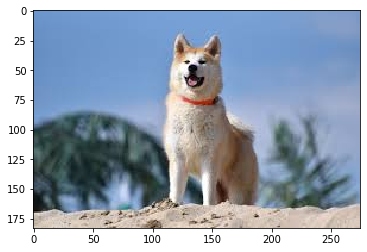

In [3]:
plt.imshow(full)

In [4]:
full.shape

(183, 275, 3)

In [5]:
face = cv2.imread('dog_face.jpg')
face = cv2.cvtColor(face,cv2.COLOR_BGR2RGB)

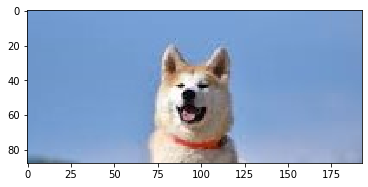

In [6]:
plt.imshow(face)

In [7]:
sum([1,2,3])

6

In [8]:
mystring = 'sum'

In [9]:
eval(mystring)

<function sum(iterable, start=0, /)>

In [10]:
myfunc = eval('sum')

In [11]:
myfunc([1,2,3])

6

In [12]:
# all the 6 methods for comparison in a list
# note how we are using strings and we will use the eval() function to convert a function
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

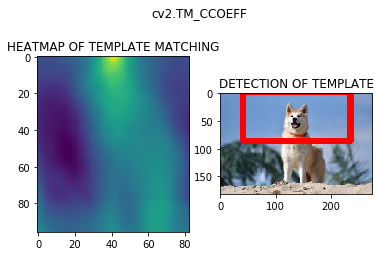

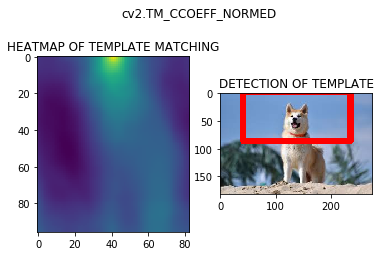

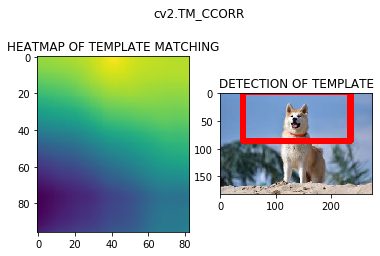

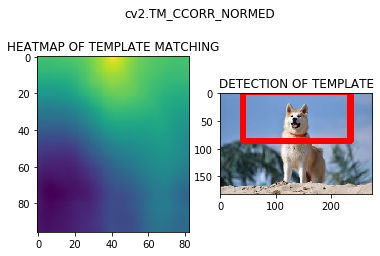

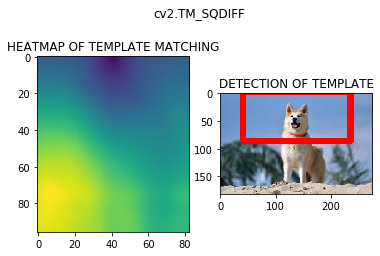

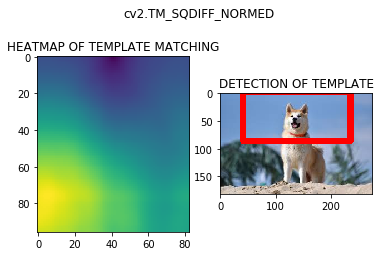

In [16]:
for m in methods:
    #CREATE A METHOD
    full_copy = full.copy()
    method = eval(m)
    #TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy,face,method)
    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc #(x,y)
    else:
        top_left = max_loc
    height,width,channels = face.shape
    bottom_right = (top_left[0]+width,top_left[1]+height)
    cv2.rectangle(full_copy,top_left,bottom_right,(255,0,0),10)
    #PLOT THE IMAGE
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    #TITLE WITH THE METHOD USED
    plt.suptitle(m)
    plt.show()
    print('\n')
    print('\n')
    